<a href="https://colab.research.google.com/github/josibelaver/josibelaver/blob/main/Departamento_de_Marketing_de_um_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= darkblue> **ESTUDO DE CASO 01: Departamento de Marketing de um banco**



Este projeto visa simular uma análise de dados para um banco e dividir os clientes em 3 grupos. Neste Notebook, foi trabalhado com o Python, Pandas e Matplotlib para segmentar o mercado de clientes, mais precisamente para conhecer o cliente e identificar as suas necessidades específicas. Foi aplicado o algoritmo de agrupamento para analisar como o banco poderá aplicar as campanhas de marketing. A aquisição dos dados veio da plataforma kagle, o processo passou pela leitura destes dados com o Pandas até a criação de hipóteses na área de marketing e sempre de forma cuidadosa, simulando os desafios diários de uma pessoa cientista de dados.

## **Significado dos termos utilizados**:


*   CUSTID: Identificação do cliente
*   BALANCE: Saldo para fazer compras
*   BALANCE_FREQUENCY: Frequência que o saldo é atualizado (1 = frequente, 0 = não frequente)
*   PURCHASES: Quantidade de compras realizadas
*   ONE_OFF_PURCHASES: Quantidade de compras feitas "de uma só vez" (sem parcelar)
*   INSTALLMENTS_PURCHASES: Quantidade de compras parceladas
*   CASH_ADVANCE: Dinheiro adiantando
*   PURCHASES_FREQUENCY: Frequencia das compras (entre 1 e 0)
*   ONE_OFF_PURCHASES_FREQUENCY: Frequência de compras à vista (entre 1 e 0)
*   PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras parceladas (entre 1 e 0)
*   CASH_ADVANCE_FREQUENCY: Frequência de saques de dinheiro adiantado
*   CASH_ADVANCE_TRX: Número de transações feitas como "Cash in Advance"
*   PURCHASES_TRX: Número de compras
*   CREDIT_LIMIT: Limite do cartão de crédito
*   PAYMENTS: Valor pago
*   MINIMUM_PAYMENTS: Valor mínimo pago
*   PRC_FULL_PAYMENT: Percentual de pagamentos da fatura "completa"
*   TENURE: Posse do titular do cartão (a quanto tempo a pessoa possui o cartão)


# Importação das bibliotecas e base de dados


*   Base de dados: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data










In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [43]:
creditcard_df = pd.read_csv('/content/CC GENERAL.csv')

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pré-processamento dos dados

## Exploração dos dados

In [45]:
#Verificando o tamanho da tabela:
creditcard_df.shape

# No caso, possui 8950 linhas, sendo cada linha um cliente e 18 colunas, nas quais são 18 características de cada cliente.

(8950, 18)

In [46]:
#Listando os 5 primeiros registros da tabela:

creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [47]:
#Listando mais informações sobre a base de dados:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Na listagem acima, os itens que não possuem o número "8950" na coluna "Non-Null Count" apontam a quantidade de itens nulos naquela categoria. Ex: a categoria "13 CREDIT_LIMIT" possui 1 item nulo. A categoria "15 MINIMUM_PAYMENTS" possui 313 itens nulos e assim por diante.

In [48]:
#Listando alguns valores estatísticos da base de dados:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [49]:
#Buscando o cliente que fez a maior compra à vista e analisando de forma individual:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [50]:
#Buscando o cliente que fez a maior compra à visto pelo limite do cartão de crédito:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [51]:
#Buscando as características do cliente listado acima:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

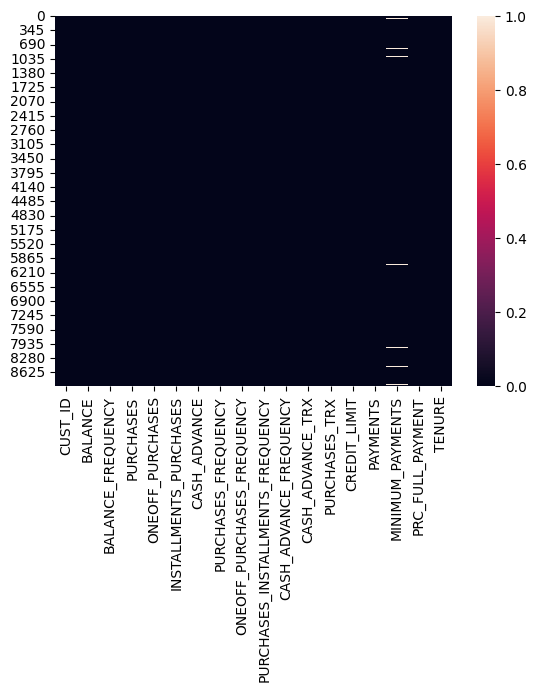

In [52]:
#Verificando se existem registros nulos nesta base de dados, através de um mapa de calor:
sns.heatmap(creditcard_df.isnull())

No mapa de calor acima, podemos observar o itens nulos através das "barras brancas" na categoria "MINIMUM_PAYMENTS". Por ele, não foi possível a verificação do único item nulo da categoria "CREDIT_LIMIT" observada na listagem citada anteriormente neste documento. O que aponta a importância de utilizar mais de um parâmetro de verificação para reduzir erros na análise.

In [53]:
#Contagem de quantos nulos existem na base de dados:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Agora que os valores nulos foram localizados, eles serão preenchidos utilizando a média. Para evitar erros em algoritmos futuros.

In [54]:
#Localizando os valores nulos da categoria MINIMUM_PAYMENTS para tratamento:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [55]:
#Tratamento dos itens nulos da categoria MINIMUM_PAYMENTS, inserindo valores de média nos espaços vazios/nulos:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [56]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [57]:
#Verificando se os dados foram preenchidos:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

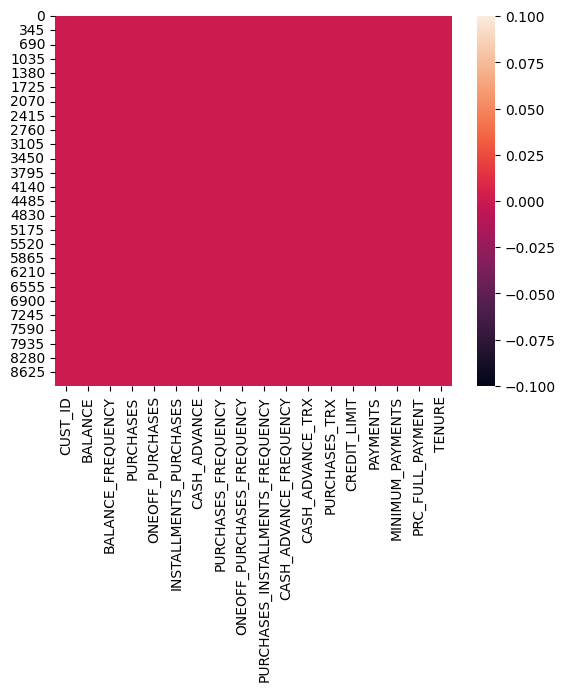

In [58]:
sns.heatmap(creditcard_df.isnull())

In [59]:
#Verificando se há valores duplicados na base de dados:
creditcard_df.duplicated().sum()

0

In [60]:
#Excluindo a coluna CUST_ID:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [61]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Visualização dos dados

In [62]:
len(creditcard_df.columns)

17

<ipython-input-63-c625d4b51821>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
<ipython-input-63-c625d4b51821>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
<ipython-input-63-c625d4b518

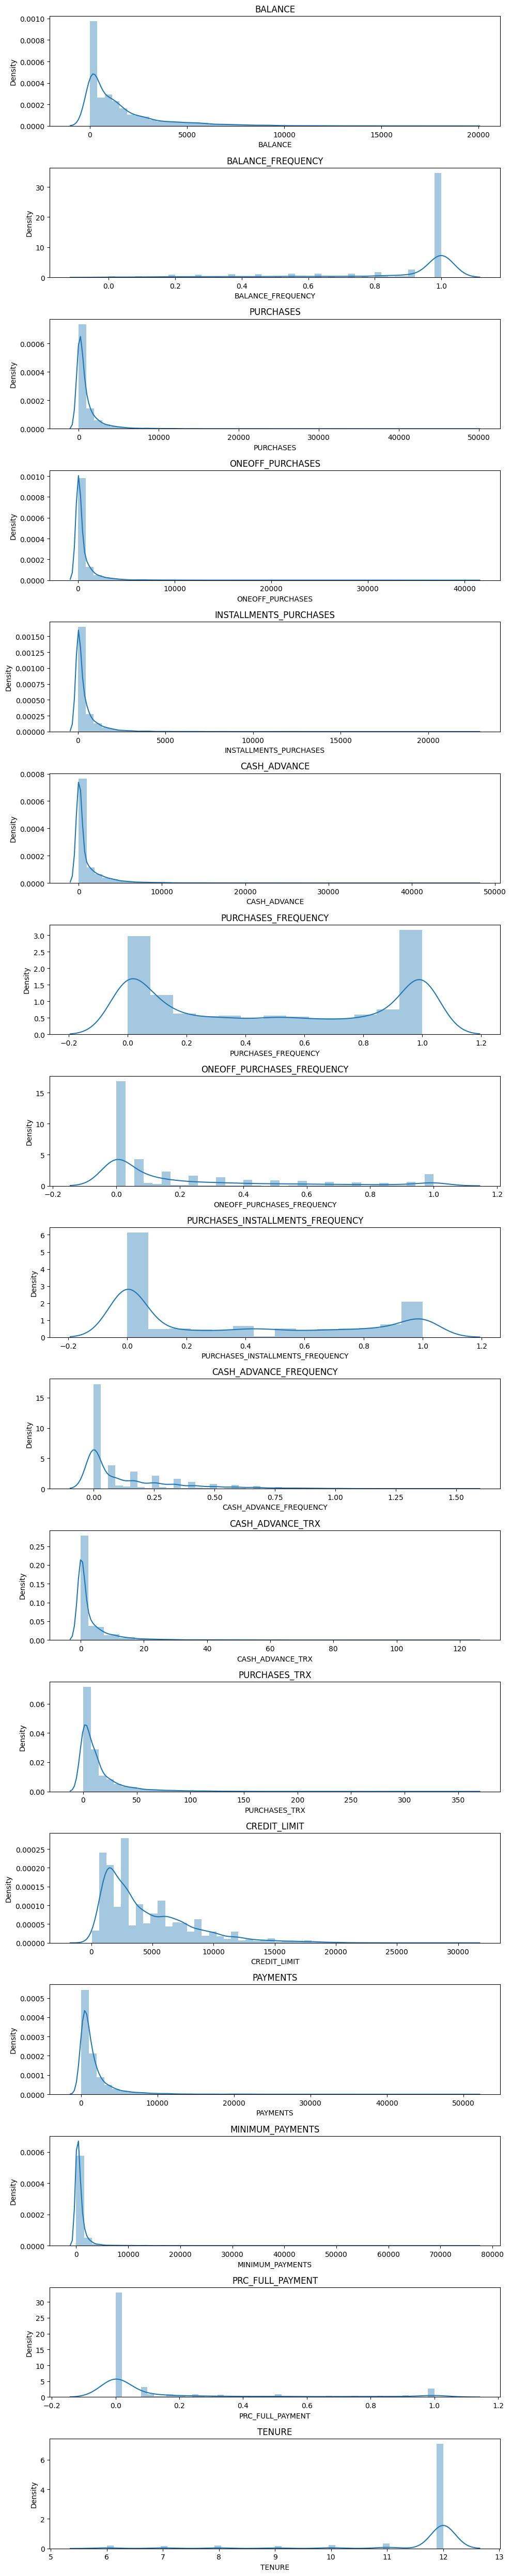

In [63]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
  plt.tight_layout();

## Análise da correlação:
### O Coeficiente de correlação de Pearson (r) é uma medida adimensional que pode assumir valores no intervalo entre -1 e +1. O coeficiente mede a intensidade e a direção de relações lineares. A intensidade diz respeito ao grau de relacionamento entre duas variáveis.

In [64]:
#Verificando a correlação entre os atributos:
correlations = creditcard_df.corr()

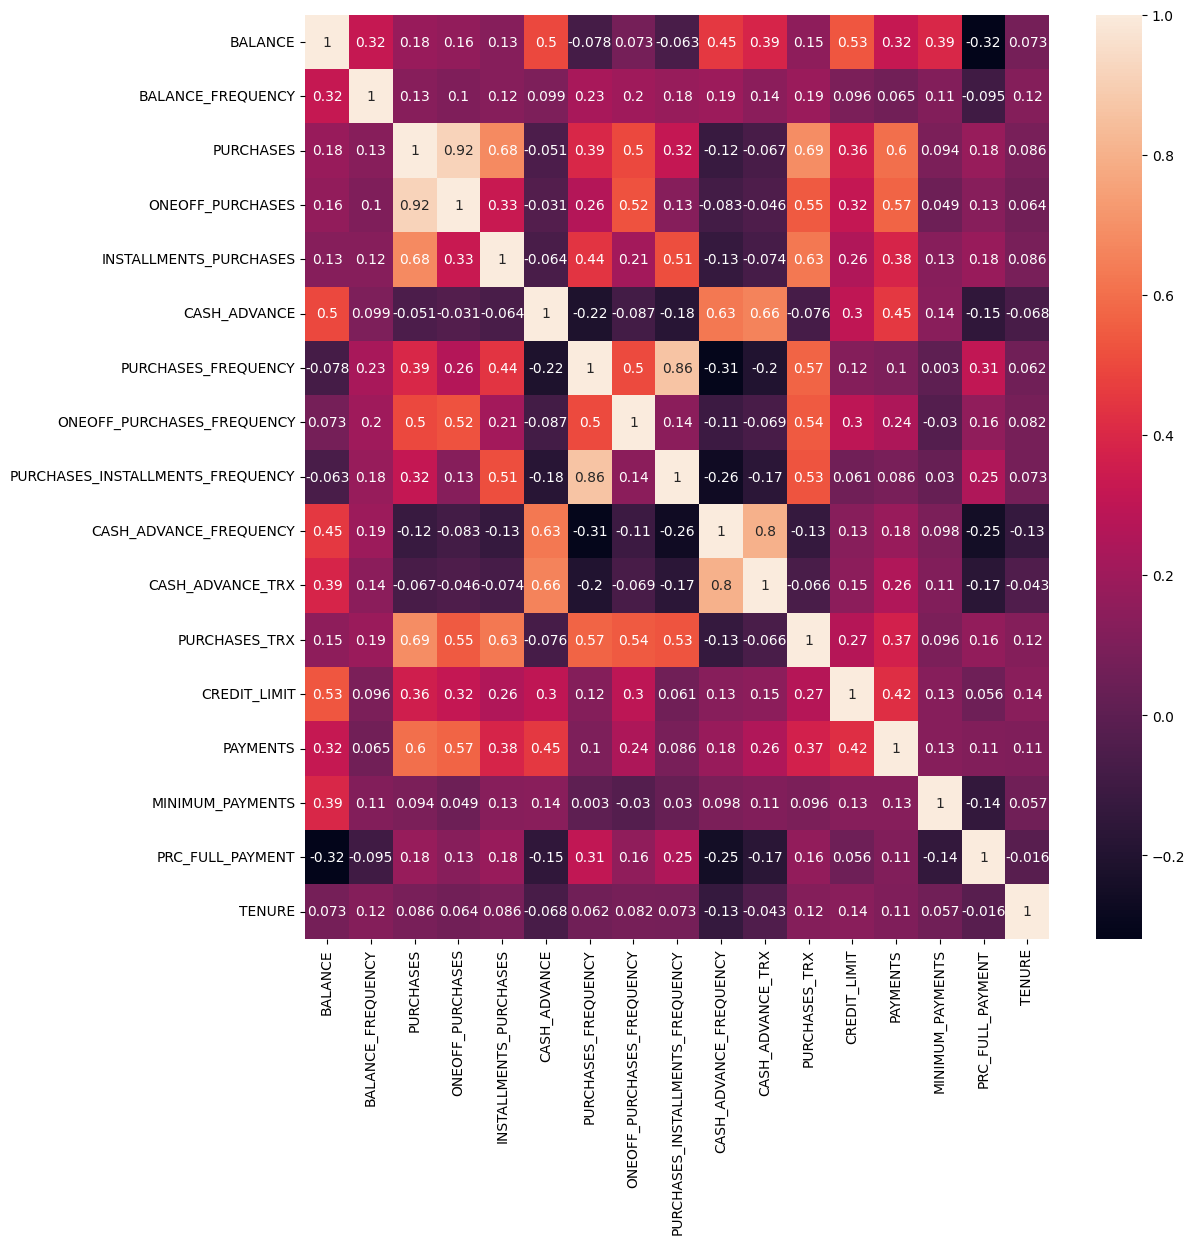

In [65]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlations, annot=True);

Este mapa de calor nos traz muitos insights para análises, veja alguns exemplos a seguir:

A frequência de compras parceladas, está fortemente correlacionada a frequência de compras em geral (0.86);
Existe uma correlação muito forte entre as compras no geral com as compras realizadas à vista (0.92);
Já a correlação entre as compras n geral com as compras parceladas é mais baixa (0.68) e isso pode gerar o insight de que as maiores compras no cartão de crédito estão relacionadas a compras a vista e não parceladas.

# Definição do número de clusters usando o Elbow Method

In [66]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [67]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [68]:
# o tipo mudou, agora precisa acessar o indice (0) ao inves de [BALANCE] na fórmula:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [69]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [70]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [71]:
wcss_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [72]:
print(wcss_1)

[152149.99999999983, 127784.84361152412, 111986.74707959307, 99074.42270603357, 91502.1796794092, 84850.41360781991, 79771.98588950909, 74490.47579076492, 69954.8412067329, 66461.9788578816, 63633.12166334465, 61364.63471054665, 59150.82022399195, 57498.03593807388, 55926.96495462858, 54268.548751028924, 53486.95887306905, 51926.62341774568, 50842.345516279805]


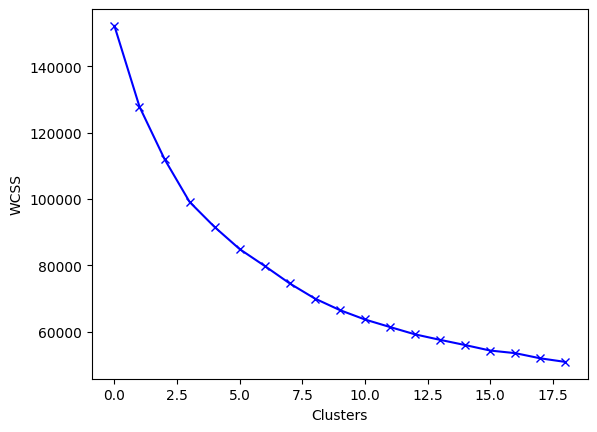

In [73]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Agrupamento com KMEANS

In [74]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
labels, len(labels)

(array([2, 5, 1, ..., 6, 6, 6], dtype=int32), 8950)

In [76]:
# Verificando a quantidade de clientes por grupo criado:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2015, 1122, 2753,  358, 1182,  872,  623,   25]))

In [77]:
kmeans.cluster_centers_

array([[-3.61849313e-01,  3.32150501e-01, -3.48161032e-02,
        -2.42510053e-01,  3.63020585e-01, -3.63470927e-01,
         9.94159654e-01, -3.84299802e-01,  1.20695531e+00,
        -4.73661705e-01, -3.60440980e-01,  1.89909523e-01,
        -2.61279824e-01, -2.14758150e-01, -3.01280253e-02,
         3.14021446e-01,  2.56102862e-01],
       [-1.36764936e-01,  3.99920526e-01,  5.35281586e-01,
         6.64171820e-01,  4.52820413e-02, -3.31561614e-01,
         9.78530628e-01,  1.90306984e+00,  1.68494122e-01,
        -4.13992016e-01, -3.30317515e-01,  6.16111657e-01,
         4.28105997e-01,  1.41135348e-01, -1.58759452e-01,
         4.47649105e-01,  2.68772874e-01],
       [ 1.21664981e-02,  4.04140940e-01, -3.56896301e-01,
        -2.41754889e-01, -3.99619848e-01, -9.44713732e-02,
        -8.52359437e-01, -3.94741134e-01, -7.53928213e-01,
         1.02827306e-01, -2.86375906e-02, -4.81477611e-01,
        -3.03253675e-01, -2.50327276e-01, -1.18404785e-02,
        -4.55386275e-01,  2.7

In [78]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361849,0.332151,-0.034816,-0.242510,0.363021,-0.363471,0.994160,-0.384300,1.206955,-0.473662,-0.360441,0.189910,-0.261280,-0.214758,-0.030128,0.314021,0.256103
1,-0.136765,0.399921,0.535282,0.664172,0.045282,-0.331562,0.978531,1.903070,0.168494,-0.413992,-0.330318,0.616112,0.428106,0.141135,-0.158759,0.447649,0.268773
2,0.012166,0.404141,-0.356896,-0.241755,-0.399620,-0.094471,-0.852359,-0.394741,-0.753928,0.102827,-0.028638,-0.481478,-0.303254,-0.250327,-0.011840,-0.455386,0.273551
3,1.044635,0.467595,2.475182,1.820048,2.508863,-0.155349,1.162779,1.563685,1.267221,-0.278814,-0.145341,3.113081,1.290382,1.436111,0.555879,0.246267,0.337720
4,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
5,1.683446,0.392882,-0.221106,-0.159097,-0.230581,2.010094,-0.474634,-0.210303,-0.413898,1.915248,1.921439,-0.269346,1.027564,0.818156,0.551843,-0.390382,0.070181
6,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
7,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900


In [79]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,811.316026,0.955954,928.819692,189.920352,739.342655,216.655600,0.889355,0.087814,0.844112,0.040360,0.789082,19.430273,3543.806552,1111.440050,793.994450,0.245561,11.860050
1,1279.810158,0.972008,2146.842193,1694.826560,452.015633,283.570919,0.883082,0.770180,0.431401,0.052300,0.994652,30.024064,6052.074218,2141.716855,494.224337,0.284644,11.877005
2,1589.798367,0.973008,240.690385,191.173770,49.696375,780.760230,0.148258,0.084699,0.064807,0.155721,3.053396,2.742100,3391.088510,1008.470917,836.612807,0.020522,11.883400
3,3738.793623,0.988040,6291.468603,3613.343464,2679.801117,653.097684,0.957030,0.668935,0.868063,0.079351,2.256983,92.089385,9189.385475,5890.543674,2159.658010,0.225744,11.969274
4,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,265.852622,0.236172,11.783418
5,5068.425814,0.970341,530.808761,328.369220,202.556135,5194.132744,0.299857,0.139720,0.199944,0.518405,16.361239,8.014908,8233.147415,4101.625778,2150.253223,0.039535,11.611239
6,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
7,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000


Alguns insights:

Grupo 07: Limite do cartão mais alto (CREDIT_LIMIT = 16360) e o mais alto percentual de pagamento da fatura (PRC_FULL_PAYMENT= 0.49). Estratégia para o banco: aumentar o limite do cartão e o hábito de compras.

Grupo 04: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possuem menos dinheiro na conta corrente (BALANCE = 104) e não sacam muito dinheiro do limite do cartão (CASH_ADVANCE = 303) e 23% dos clientes realizam o pagamento da fatura completa.

Grupo 05: Usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco). Possuem muito dinheiro na conta corrente (BALANCE = 5068) e sacam muito dinheiro do cartão de crédito (5194 - CASH_ADVANCE), compram pouco (0.30 - PURCHASES_FREQUENCY) e usam bastante o limite do cartão para saques (0.52 - CACHE_ADVANCE_PURCHASES). Pagam muito pouco a fatura completa (0.03 - PRC_FULL_PAYMENT). Este acaba sendo o grupo que mais apresenta lucro ao banco, mas também o que mais apresenta risco porque se nao pagam a fatura completa a tendência é que esse grupo vai se endividar cada vez mais rápido.

Grupo 04: Clientes mais novos, são clientes do banco em média há 7 anos (TENURE) e que possuem menos dinheiro na conta corrente (864)

In [80]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


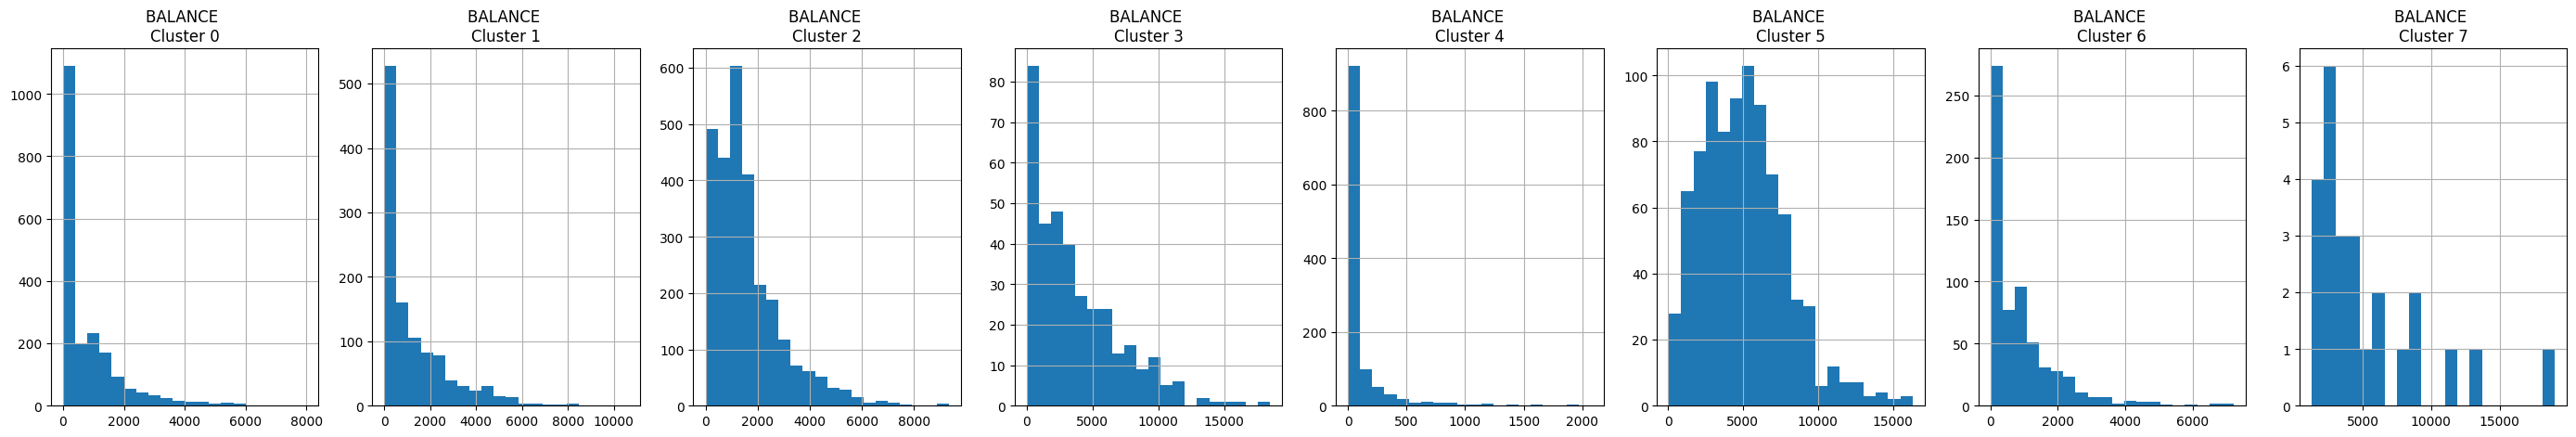

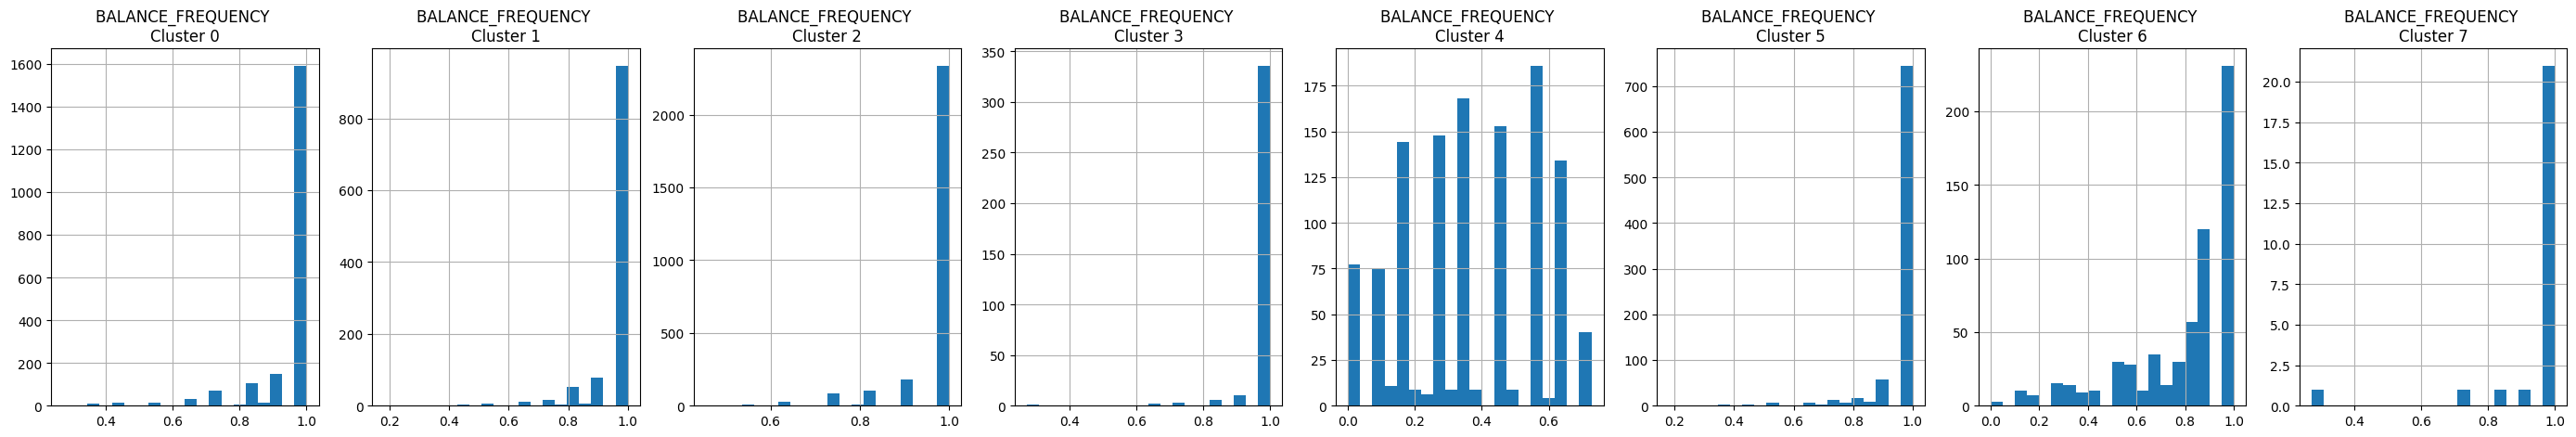

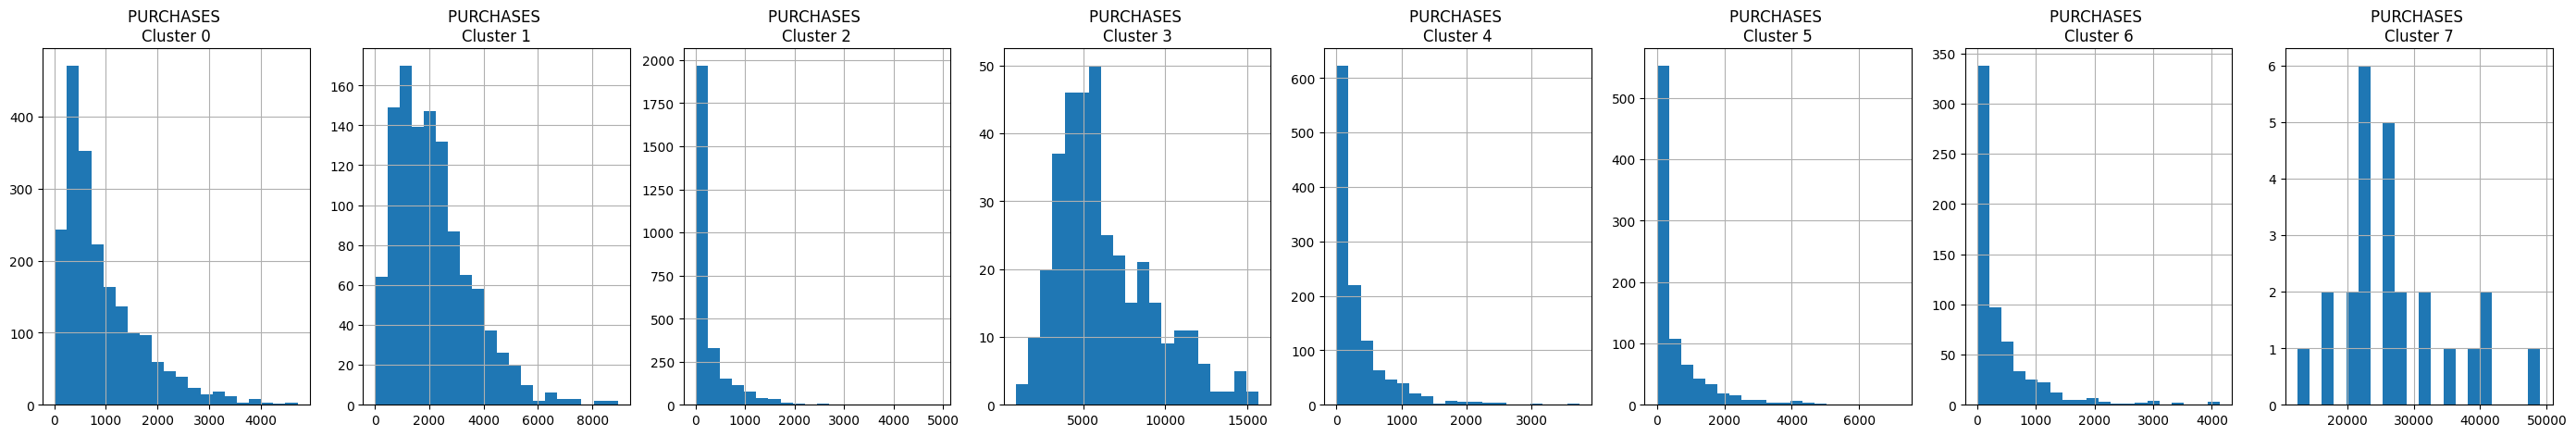

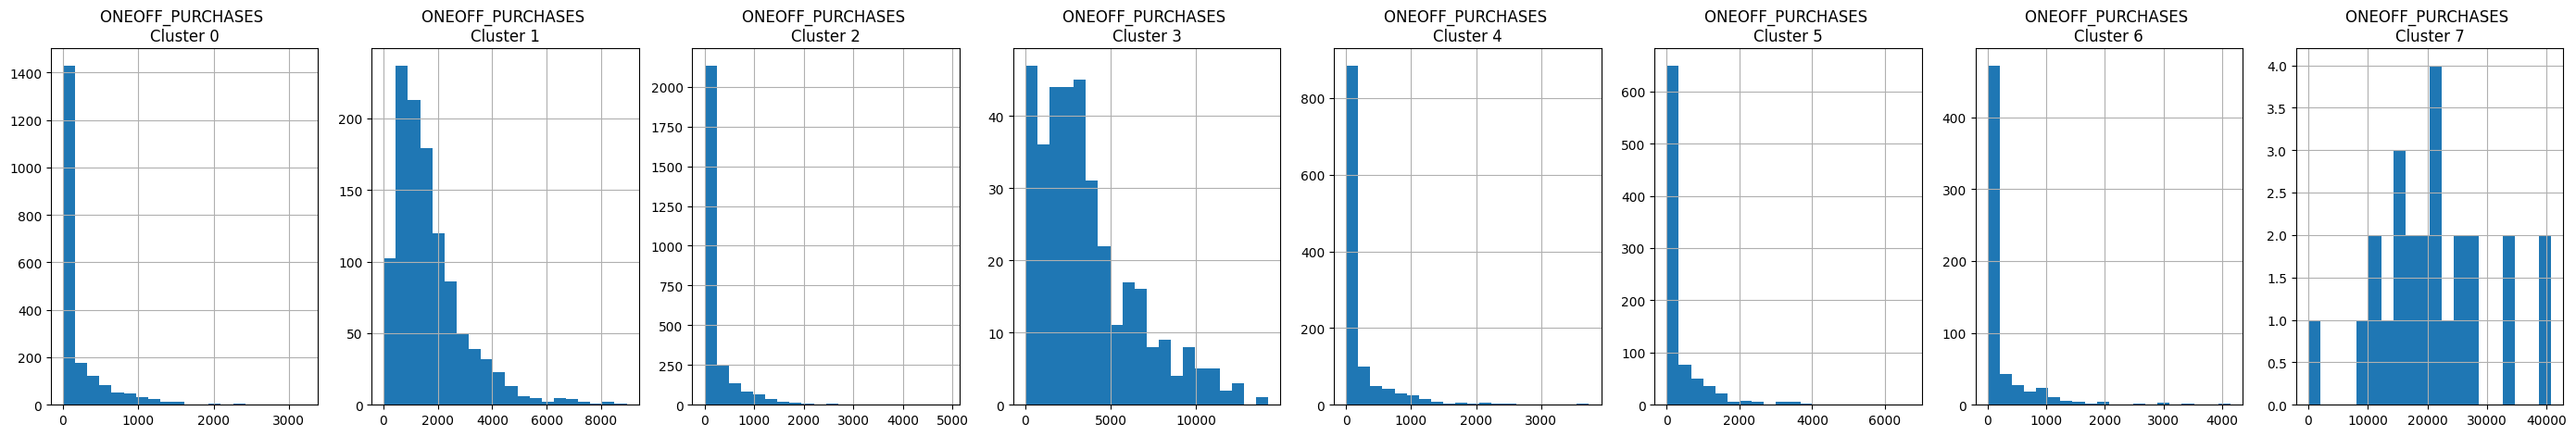

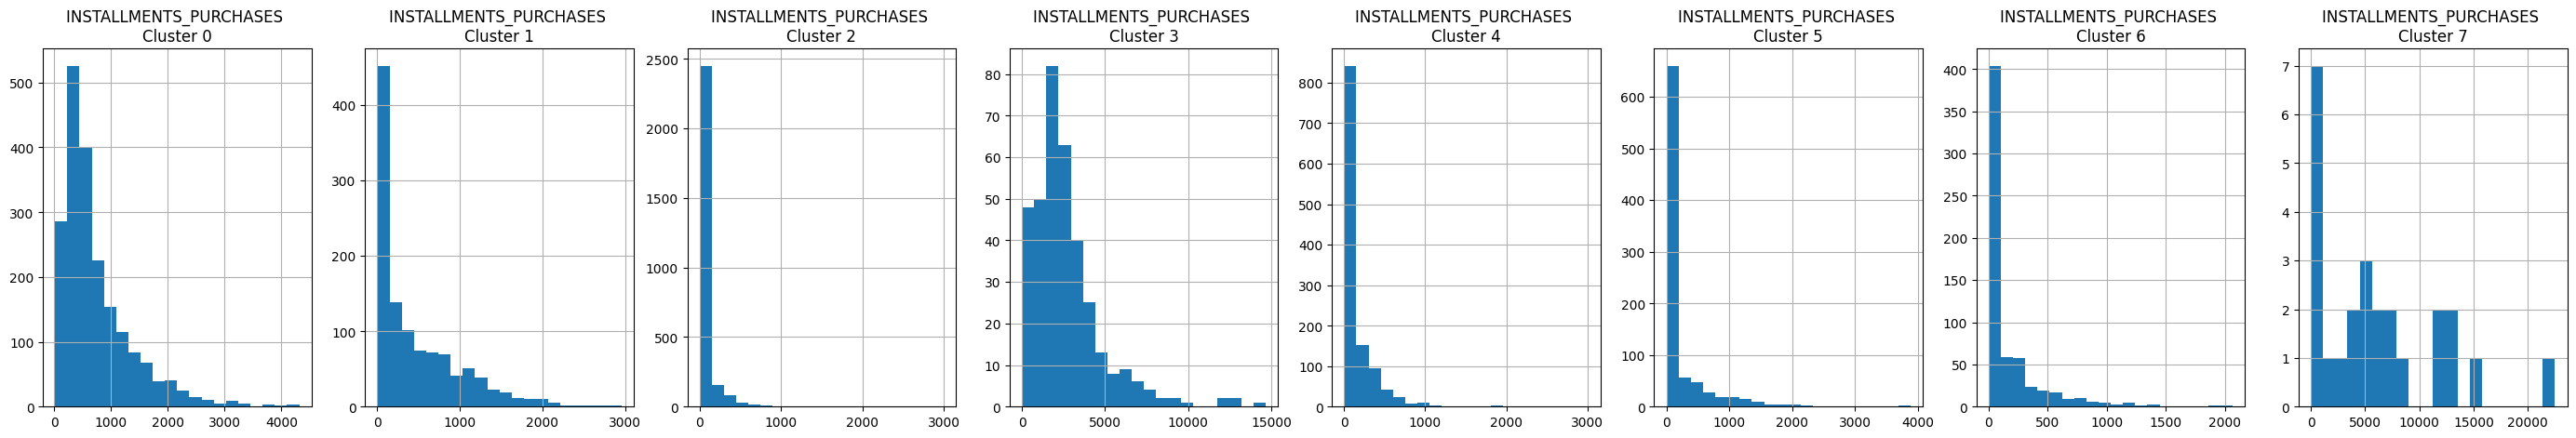

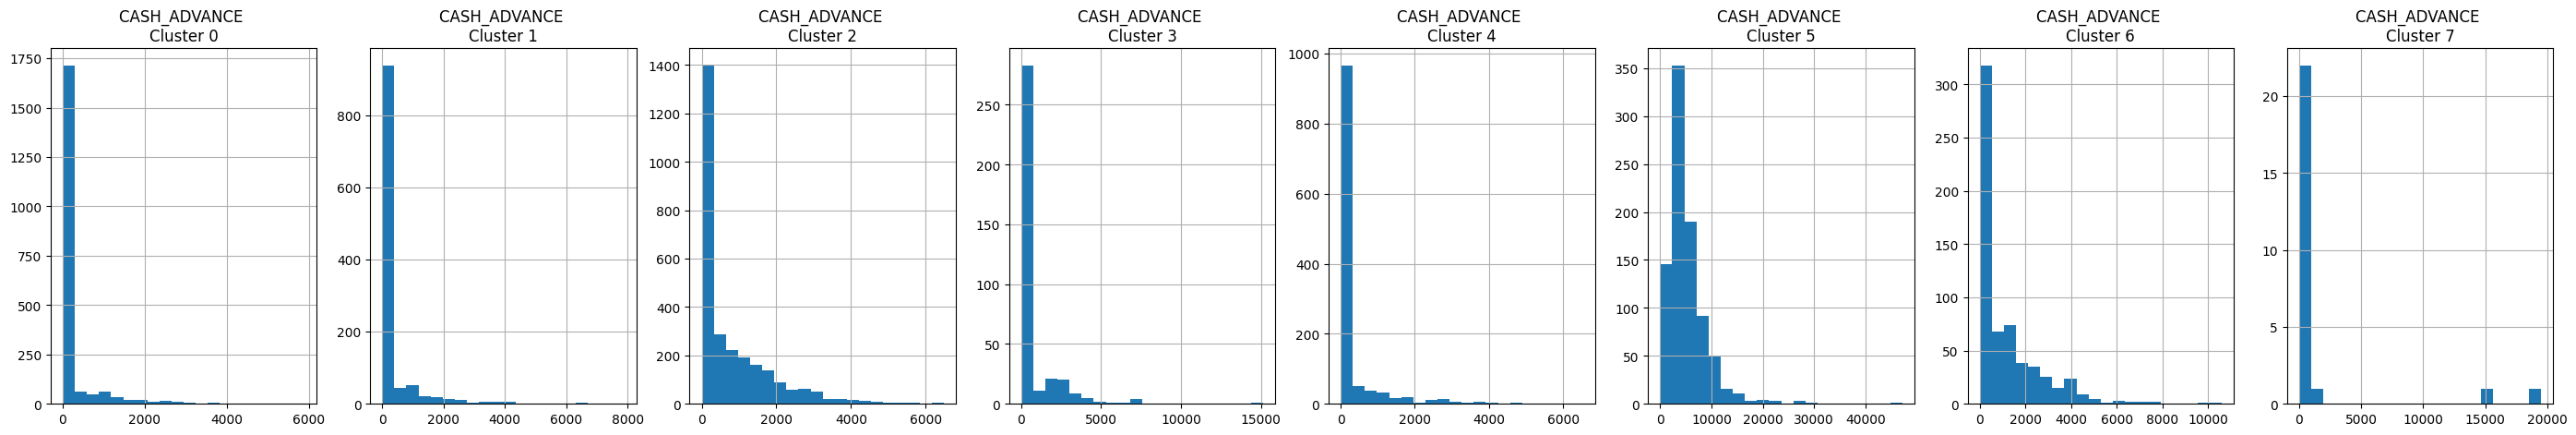

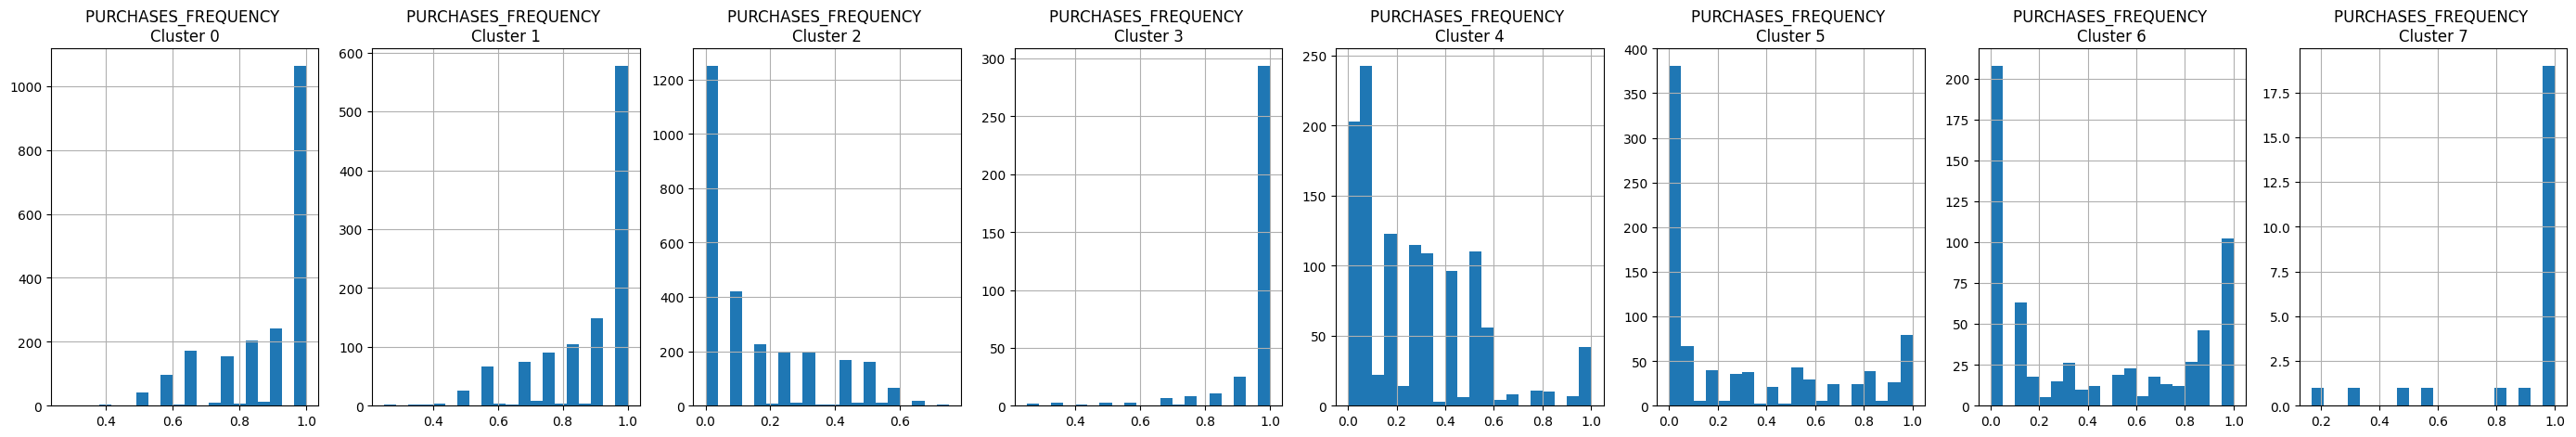

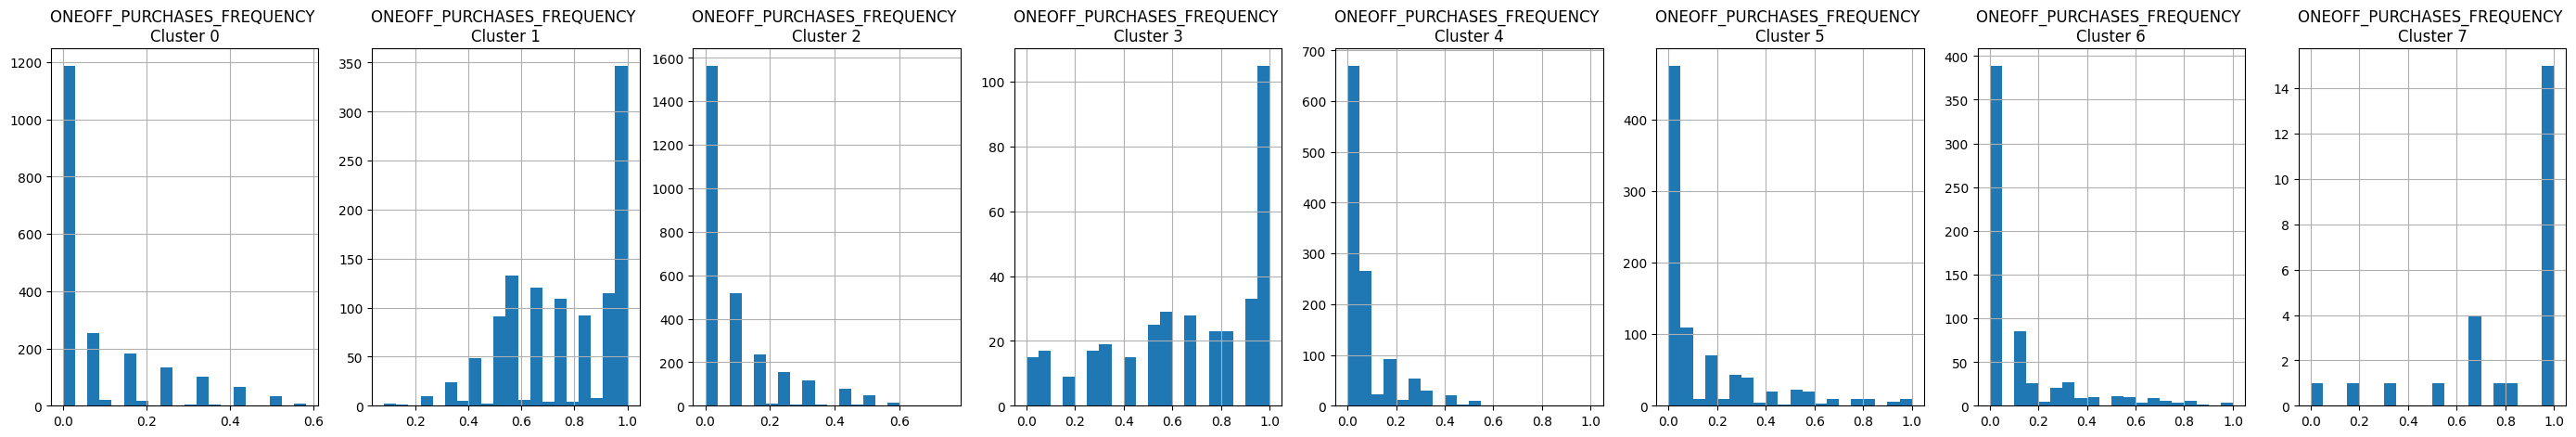

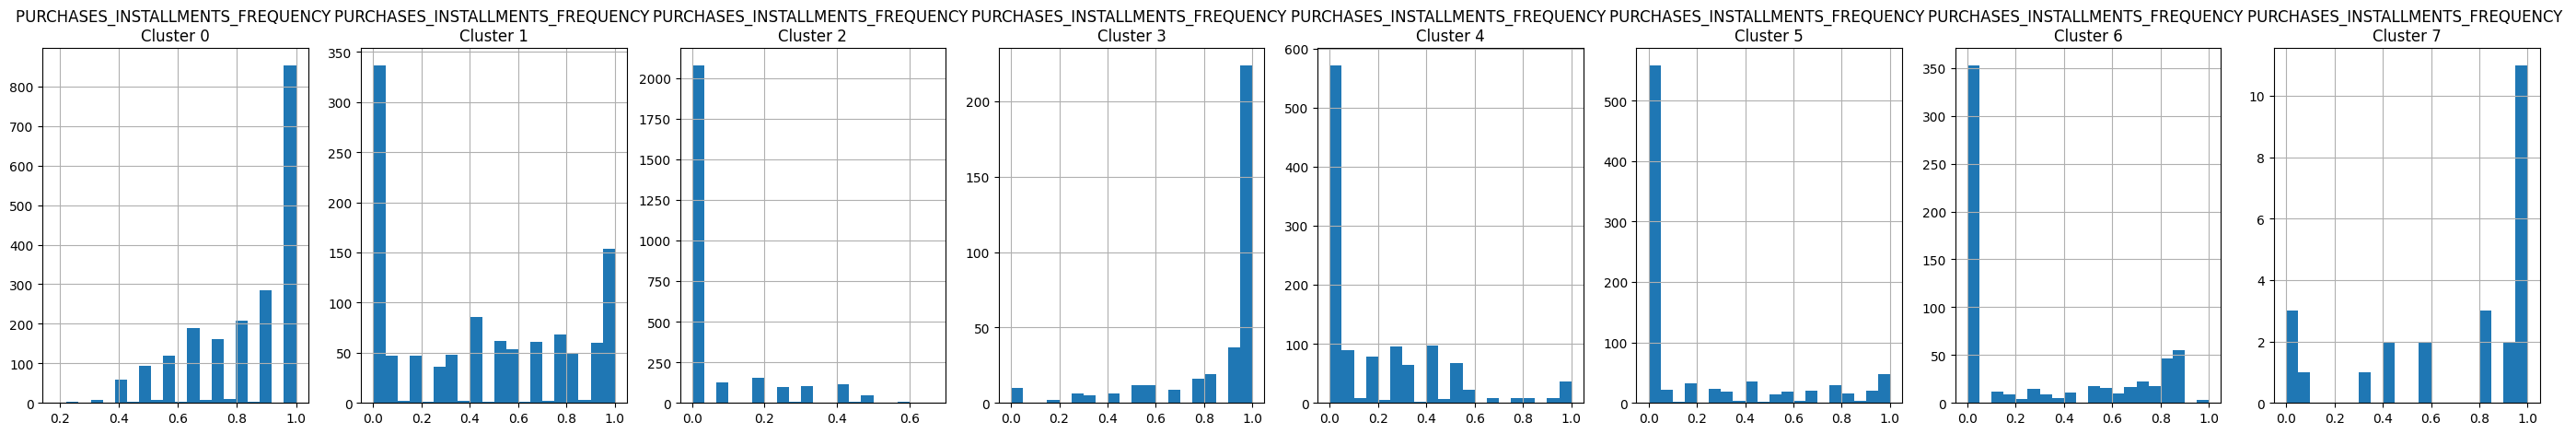

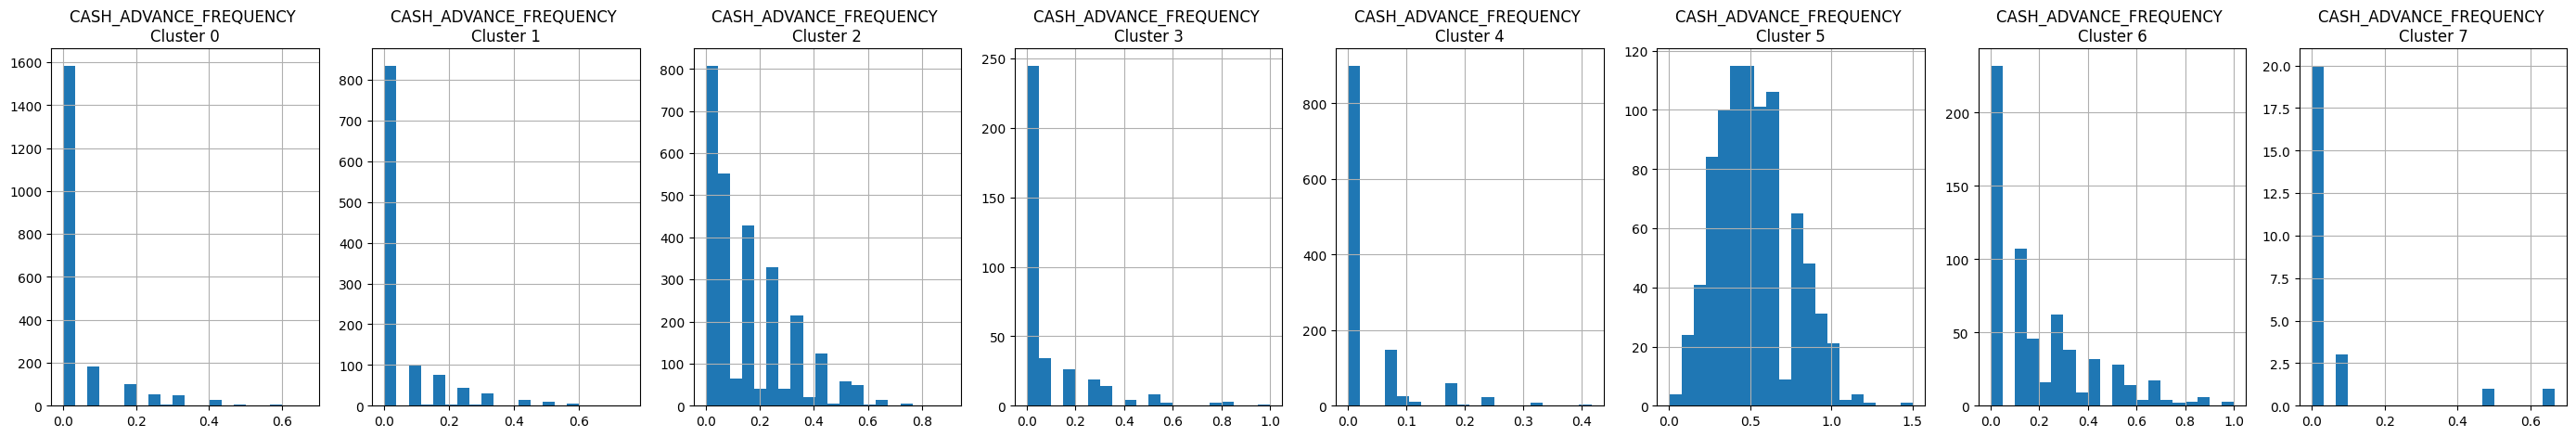

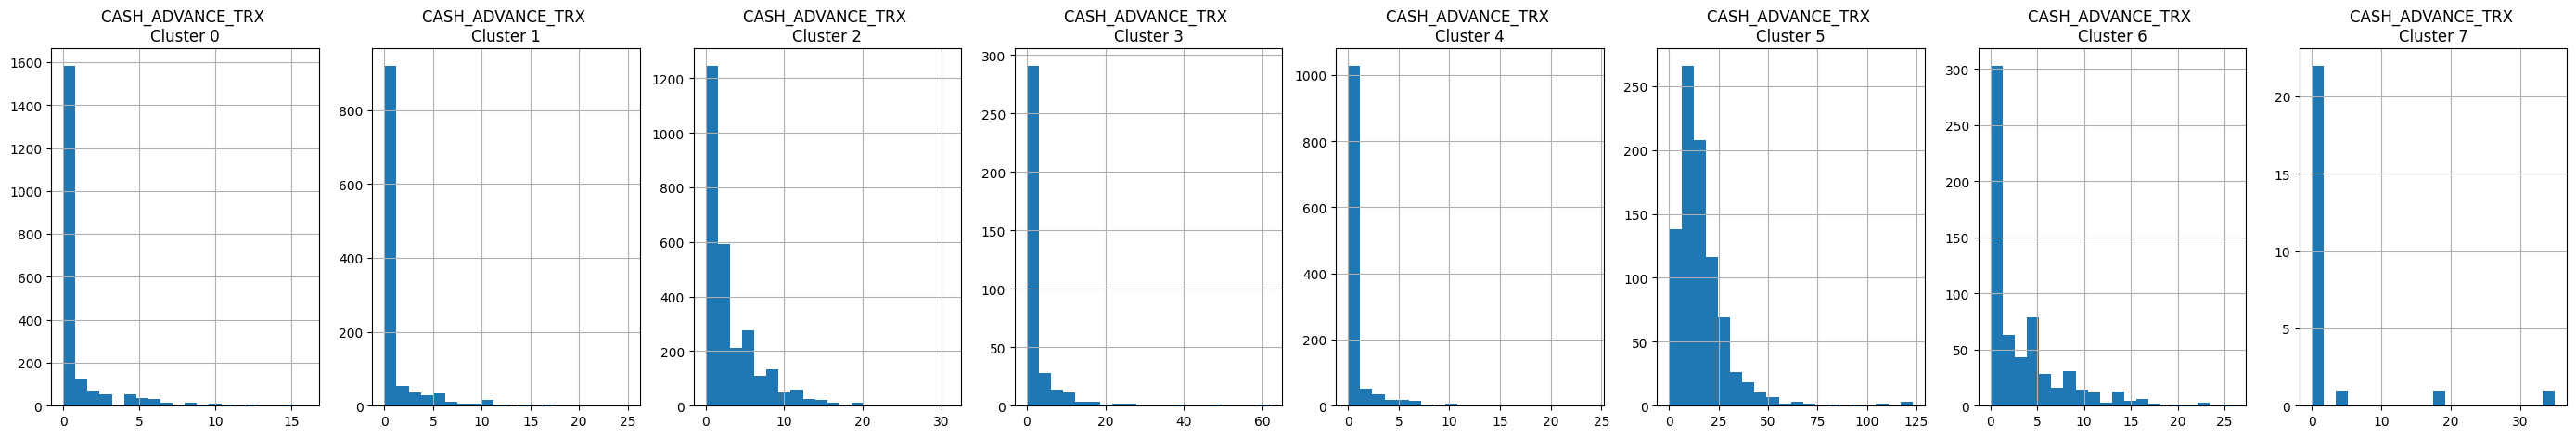

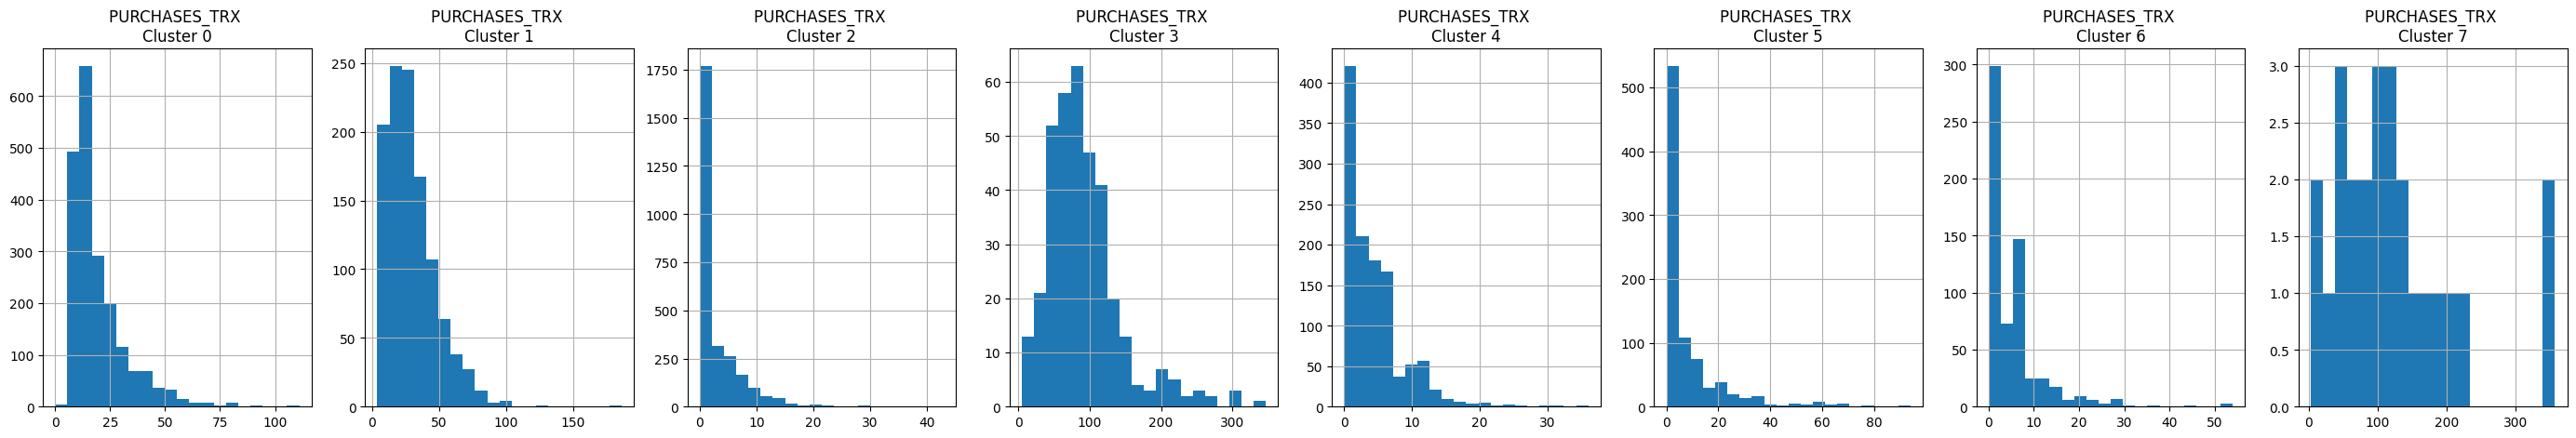

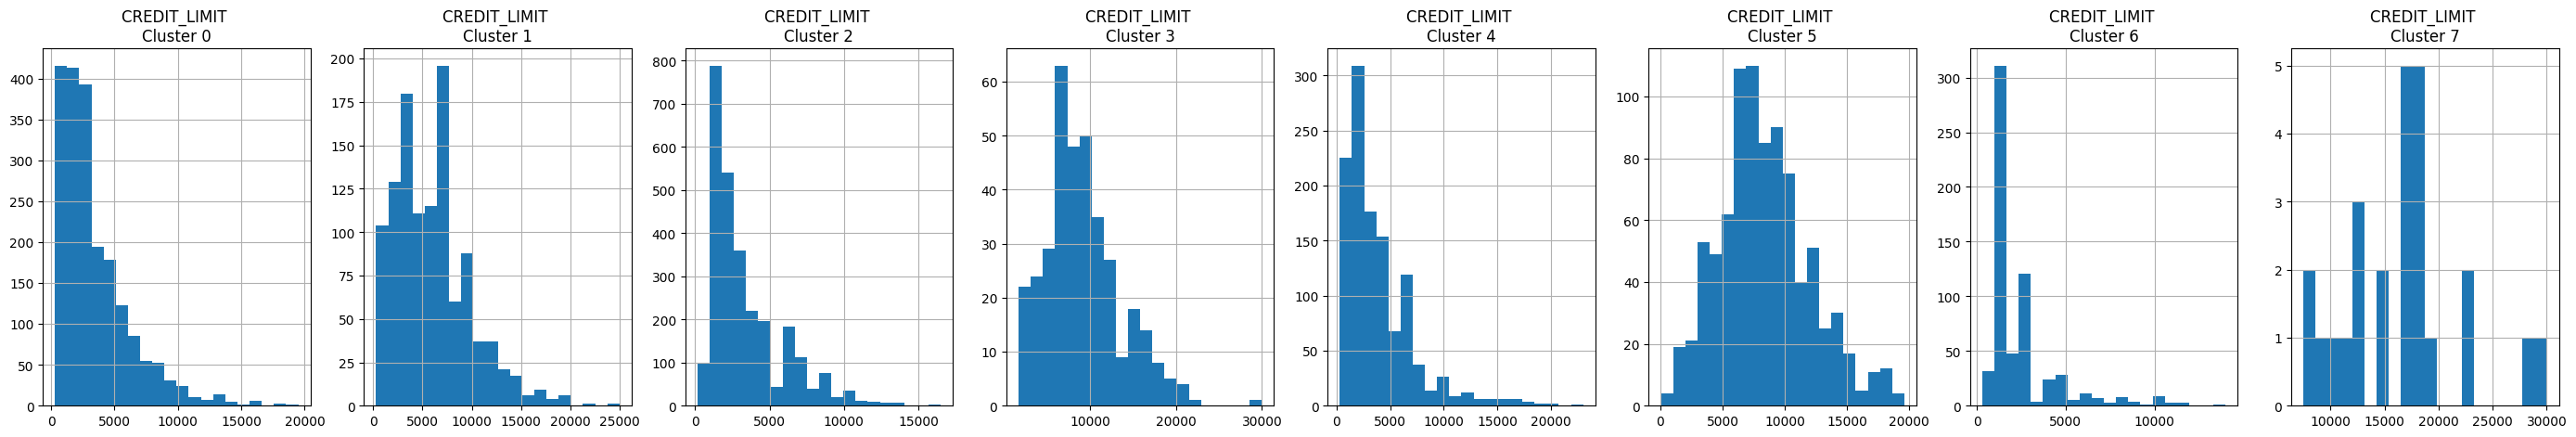

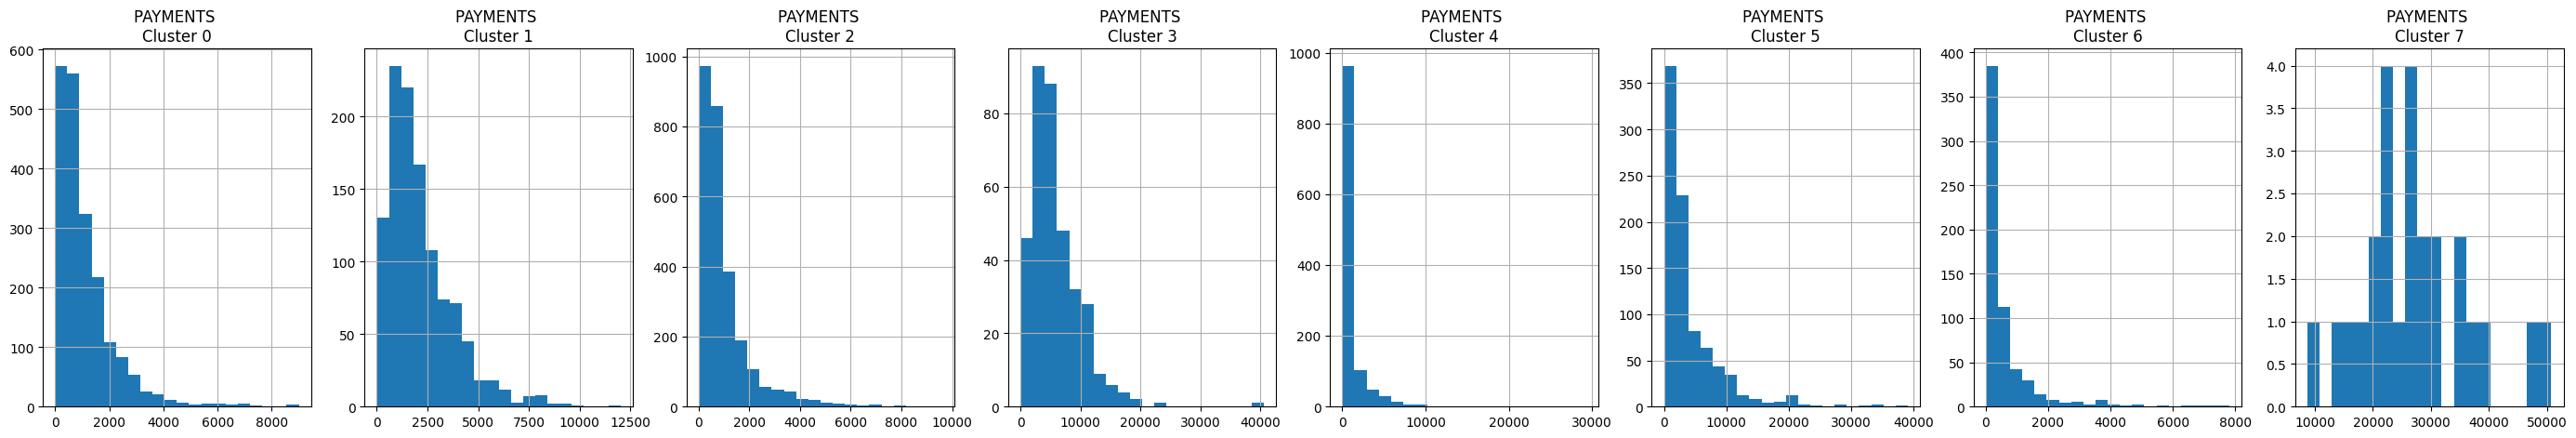

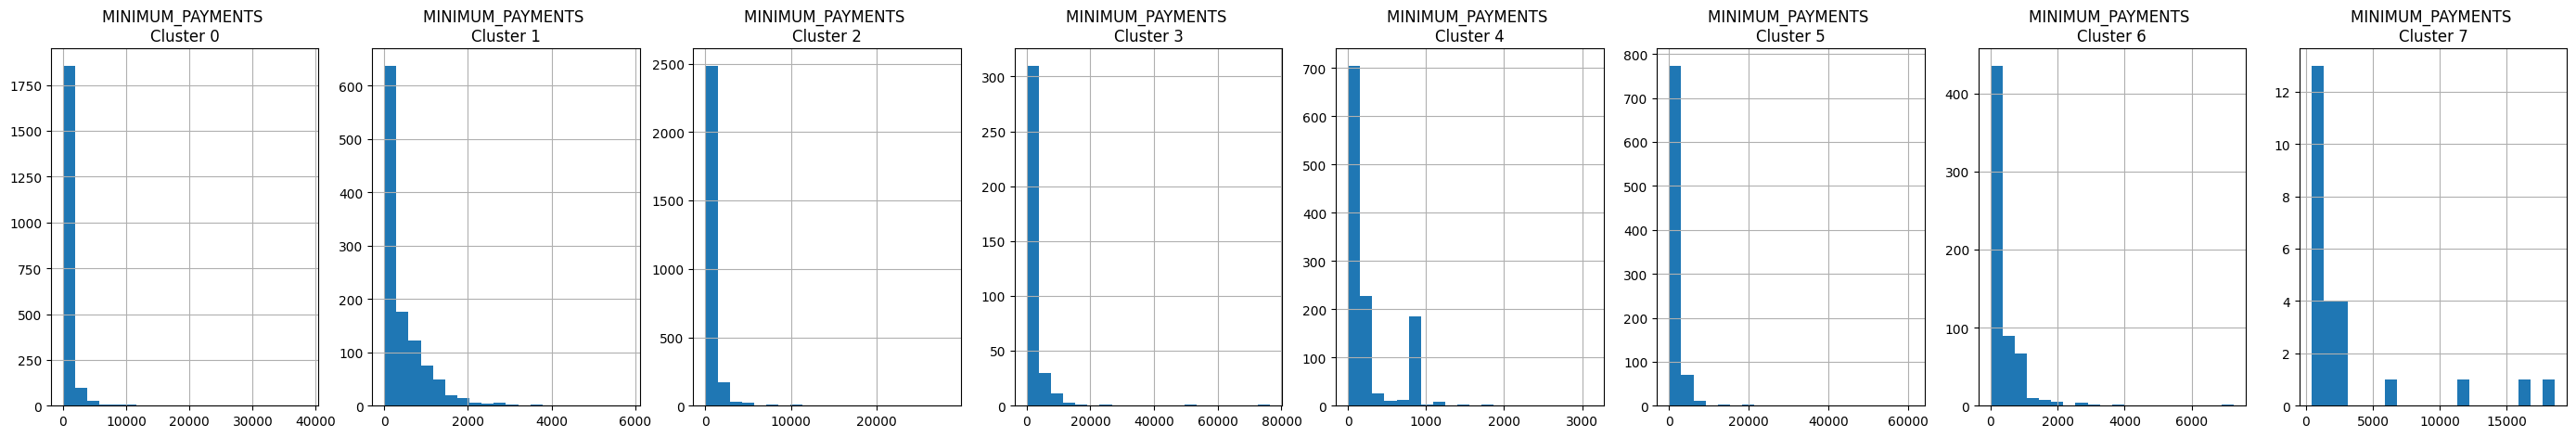

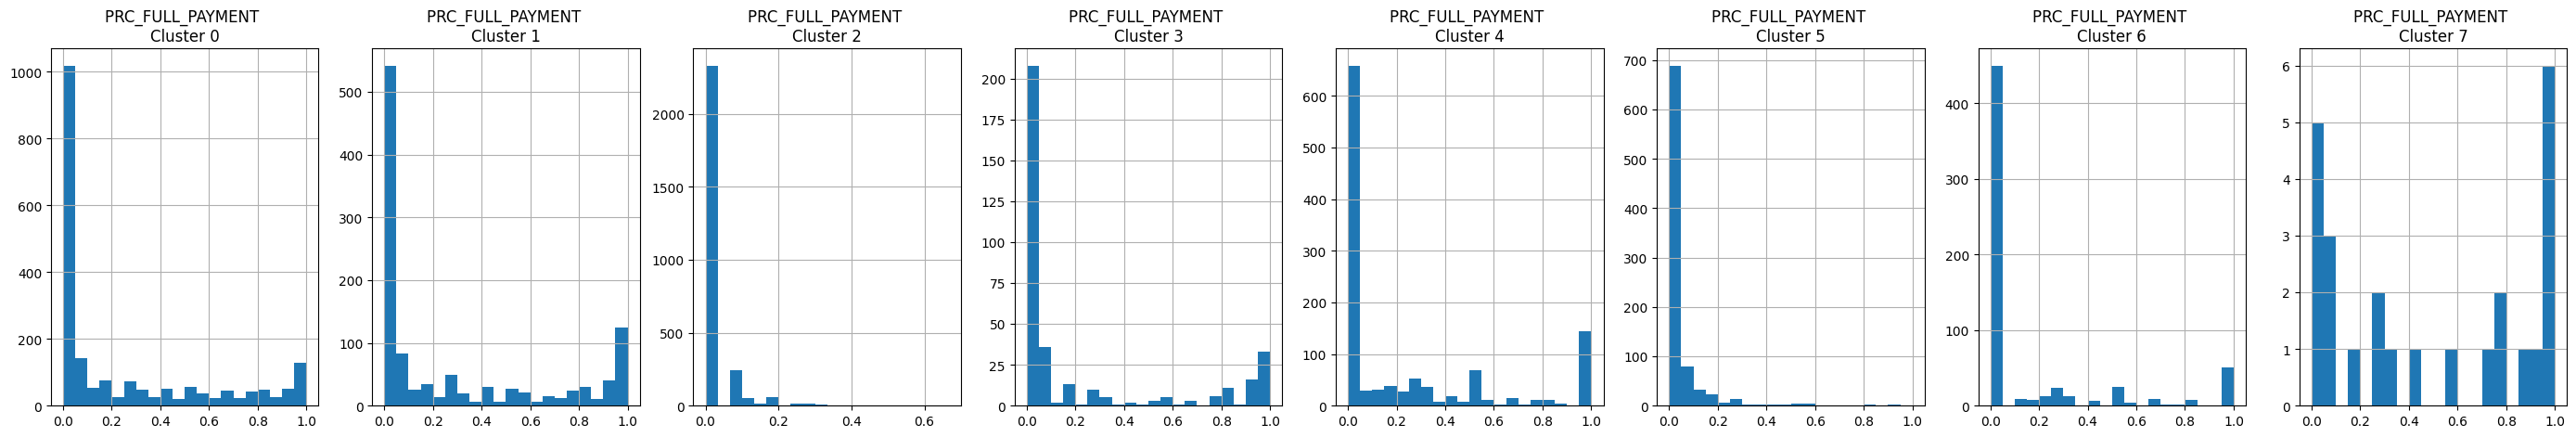

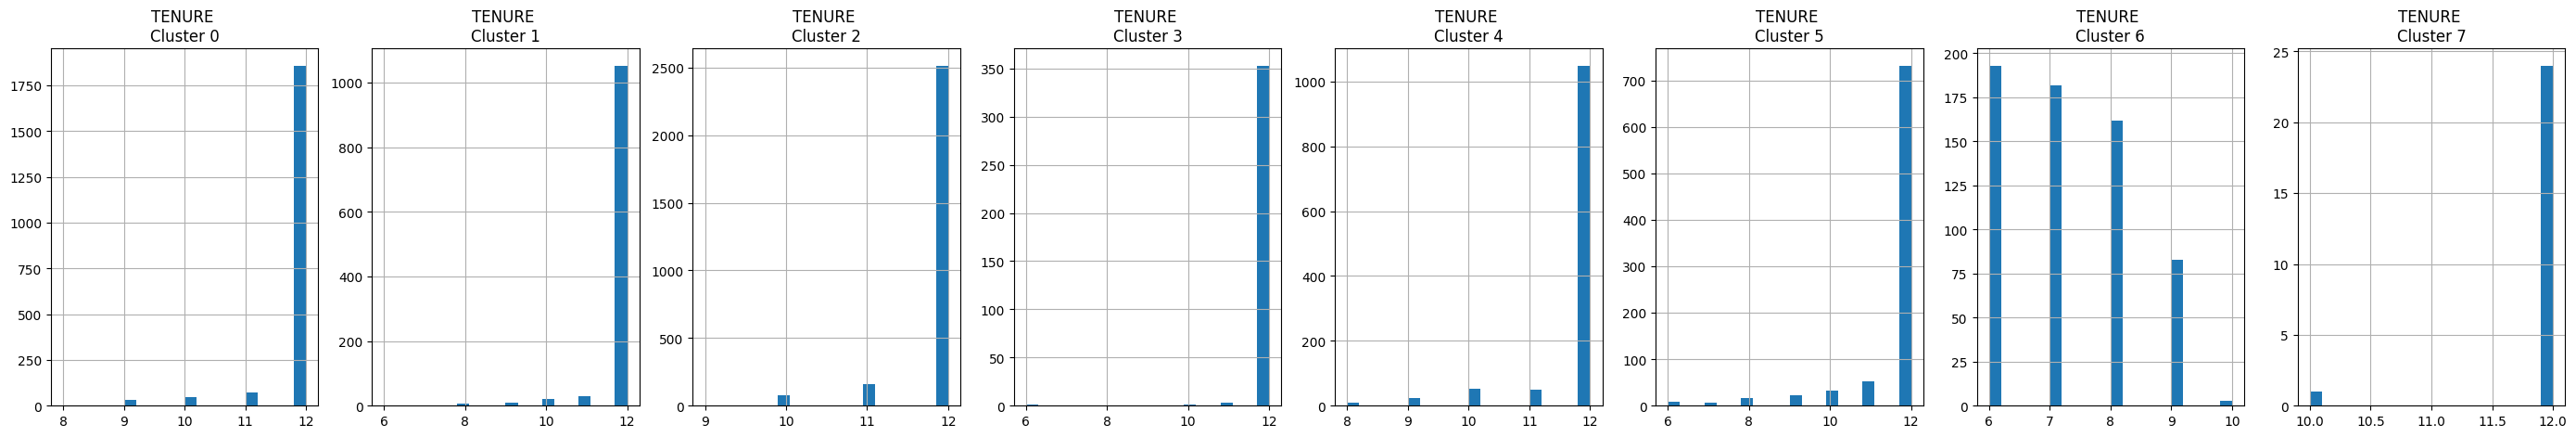

In [81]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
      plt.subplot(1,8, j + 1)
      cluster =  creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
      cluster[i].hist(bins = 20)
      plt.title('{} \nCluster {}' .format(i, j))
    plt.show()

In [83]:
# Ordenando os dados para o setor de marketing:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7526,109.473217,1.0,1251.26,635.79,615.47,0.0,0.833333,0.25,0.666667,0.0,0,19,2700.0,958.931815,187.560093,0.250000,12,0
3447,11.736675,1.0,119.28,0.00,119.28,0.0,1.000000,0.00,1.000000,0.0,0,12,1700.0,115.257036,92.166894,0.444444,12,0
1401,2849.474770,1.0,574.92,0.00,574.92,0.0,1.000000,0.00,1.000000,0.0,0,12,2500.0,3909.150905,5092.799300,0.000000,12,0
7416,1273.498021,1.0,449.28,0.00,449.28,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,475.727103,4224.383226,0.000000,12,0
3449,1716.340133,1.0,184.23,0.00,184.23,0.0,1.000000,0.00,1.000000,0.0,0,13,1700.0,510.451516,833.346049,0.000000,12,0


In [84]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
507,2643.343414,1.000000,26402.39,22257.39,4145.00,0.00000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.276620,534.032339,1.000000,12,7
5260,4060.710208,0.727273,22500.00,0.00,22500.00,0.00000,0.500000,0.000000,0.416667,0.000000,0,12,23000.0,8760.860264,1645.535202,0.000000,12,7
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.00000,1.000000,1.000000,0.583333,0.000000,0,56,17000.0,17575.200830,2465.465414,0.166667,12,7
5358,6372.182817,1.000000,22101.78,22101.78,0.00,19513.47483,0.333333,0.333333,0.000000,0.666667,35,40,7500.0,39461.965800,6764.853481,0.250000,12,7
4282,2004.816462,1.000000,20747.34,13007.07,7740.27,0.00000,1.000000,1.000000,1.000000,0.000000,0,95,10000.0,17005.409690,410.800069,1.000000,12,7


# PCA (Principal Component Analysis)
É um algoritmo de aprendizagem não supervisionada.
Aplica redução de dimensionalidade, porém, tenta manter as informações originais com as mesmas caracteríticas
Encontra um novo conjunto de características que são chamados de componentes
Os componentes são criados por meio das características não correlacionadas.
**No percentual de correlação, o PCA une os atributos não tão correlacionados em um único atributo somente.**

In [87]:
#Vamos transformar nosso espaço de características que atualmente tem 18, em apenas 2:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221953, -1.07645066],
       [-1.13829072,  2.50648421],
       [ 0.96967941, -0.38351929],
       ...,
       [-0.92620444, -1.81078923],
       [-2.33655136, -0.6579704 ],
       [-0.55642382, -0.40046693]])

In [88]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138291,2.506484
2,0.969679,-0.383519
3,-0.873625,0.043168
4,-1.599434,-0.688582


In [89]:
#Realizando a concatenação:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,2
1,-1.138291,2.506484,5
2,0.969679,-0.383519,1
3,-0.873625,0.043168,2
4,-1.599434,-0.688582,2


<Axes: xlabel='pca1', ylabel='pca2'>

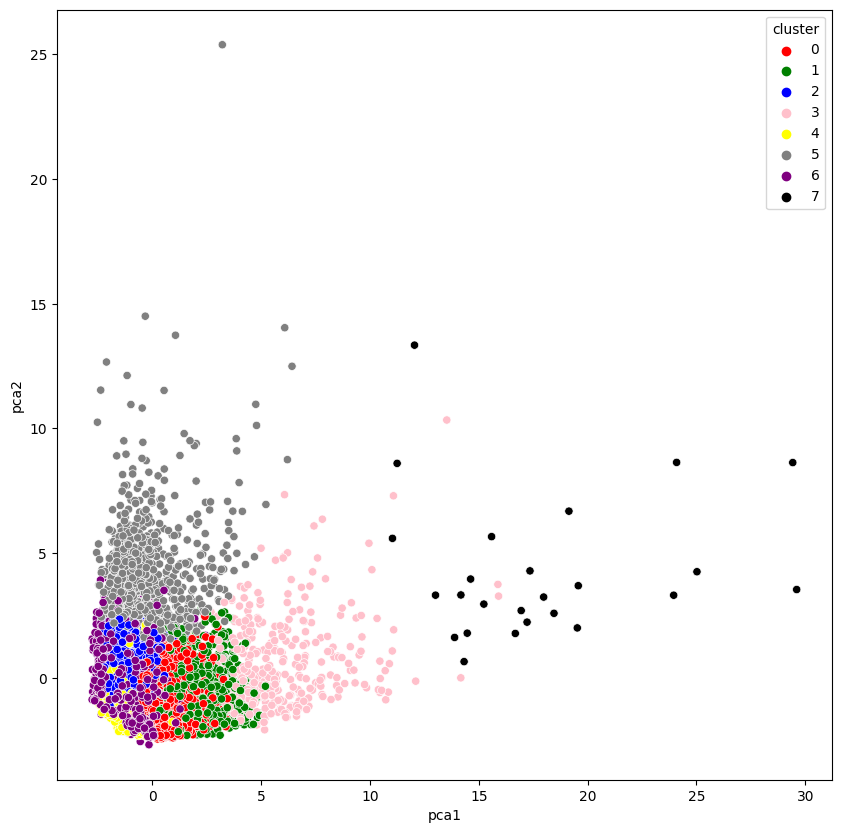

In [91]:
#Conseguimos separar os grupos de forma grafica, na qual cada cor representa um grupo. Não conseguimos
#identificar que o pca1 é o limite ou o pca2 é o saldo da conta corrente porque fizemos a redução de dimensionalidade e por trás um algoritmo fez a combinação dos atributos.
# esse grafico é mais para fazer uma visualização dos dados.
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

#AUTOENCODERS - intuição
São um tipo de redes neurais para codificar dados
Utiliza a mesma entrada e a mesma saída para comparar os resultados.
ex: se for uma imagem, usamos cálculos matemáticos para compcatra a imagem e depois usamos cálculos matemáticos para descompactar a imagem. E a imagem descompactada deve ser o mais parecido possível com a imagem compactada. Outro exemplo seria a criptografia de dados na área de segurança.

1. Versão comprimida da informação na camada do meio (codificação)
2. Funcionam se existir correlação entre os dados de entrada (resultados ruins se os dados de entrada são todos independentes).


In [92]:
#Aplicação de autoencoders e vamos reduzir de 17 atributos para 10.
#Vamos aplicar o Elbow (para analisarmos quantos clusters vamos definir),
#Depois o K-menas (para termos novos grupos) e por último o PCA novamente.

#constatando a quantidade de colunas que no caso são 17:
creditcard_df_scaled.shape

(8950, 17)

In [94]:
#Estrutura do autoencoders da codificação até a decodificação: 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [96]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu') (input_df)
x = Dense(2000, activation='relu') (x)

encoded = Dense(10, activation='relu') (x)

x = Dense(2000, activation='relu') (input_df)
x = Dense(500, activation='relu') (x)

decoded = Dense(17) (x)

In [97]:
# autoencoder: variavel:
autoencoder = Model(input_df, decoded)

In [98]:
# encoder
encoder = Model(input_df, encoded)

In [100]:
#Treinamento do autoencoder para encontrar a melhor conjunto de pesos.
#E esses pesos que serão utilizados pra fazer os calculos de somatorio e multiplicação para termos os resultados:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')


# chegamos aos erros 0.0025

In [103]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 7s 17ms/step - loss: 0.0322
Epoch 2/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0136
Epoch 3/50
280/280 [==============================] - 7s 23ms/step - loss: 0.0134
Epoch 4/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0123
Epoch 5/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0099
Epoch 6/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0076
Epoch 7/50
280/280 [==============================] - 5s 17ms/step - loss: 0.0150
Epoch 8/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0106
Epoch 9/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0090
Epoch 10/50
280/280 [==============================] - 5s 19ms/step - loss: 0.0095
Epoch 11/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0041
Epoch 12/50
280/280 [==============================] - 5s 17ms/step - loss: 0.0091
Epoch 13/50
2

In [104]:
creditcard_df_scaled.shape

(8950, 17)

In [105]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 5ms/step


In [106]:
compact.shape

(8950, 10)

In [107]:
#Temos os dados com as 17 colunas:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [108]:
#Agora temos os dados com as 10 colunas que foram compactadas:
compact[0]

array([0.07299195, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09821471, 0.05961282, 0.        ],
      dtype=float32)

In [109]:
wcss_2 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

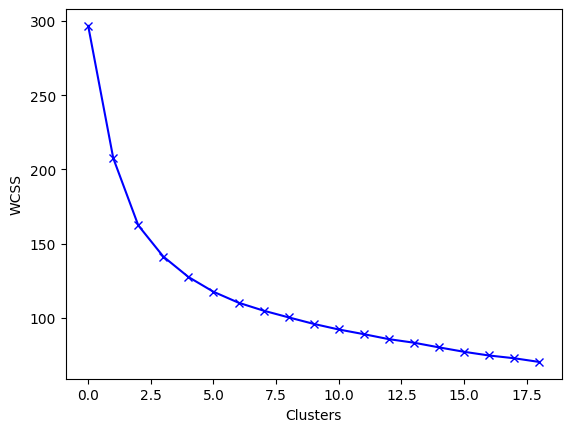

In [110]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

<ipython-input-111-7b153d4c97fa>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
<ipython-input-111-7b153d4c97fa>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


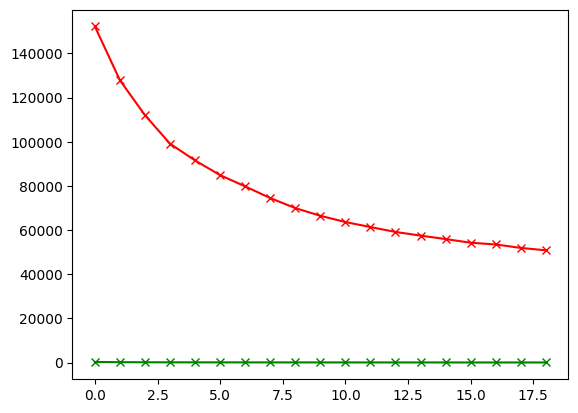

In [111]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');


In [112]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [113]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 2, 1, ..., 2, 2, 2], dtype=int32), (8950,))

In [116]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [119]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.062165,0.012239
1,0.041316,-0.100889
2,-0.043724,0.087765
3,-0.077880,0.080590
4,-0.062599,-0.016590


In [120]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.062165,0.012239,1
1,0.041316,-0.100889,2
2,-0.043724,0.087765,1
3,-0.077880,0.080590,1
4,-0.062599,-0.016590,1


<Axes: xlabel='pca1', ylabel='pca2'>

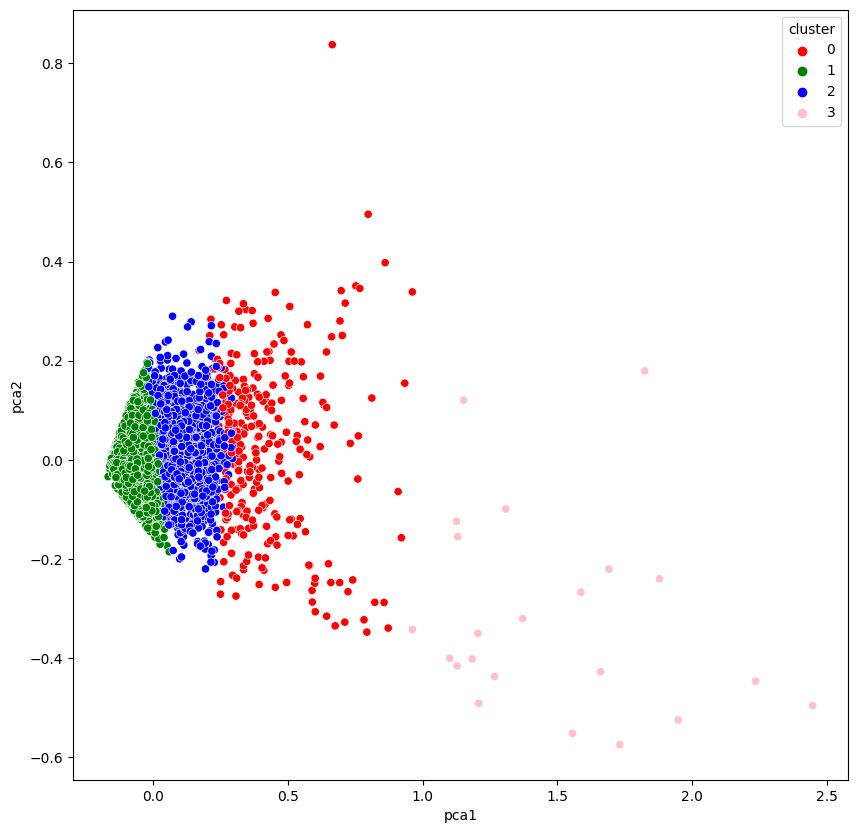

In [121]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [123]:
df_cluster_ordered = df_cluster_at.sort_values(by='cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2015,5919.198579,1.0,9321.13,4678.79,4642.34,0.0,1.000000,1.000000,1.000000,0.0,0,171,15000.0,7303.897866,1395.715133,0.000000,12,0
560,1311.732049,1.0,10700.63,2912.65,7787.98,0.0,0.916667,0.500000,1.000000,0.0,0,222,6000.0,9853.313787,280.014823,0.818182,12,0
5771,4450.957226,1.0,8445.96,1987.85,6458.11,0.0,1.000000,0.750000,1.000000,0.0,0,224,6500.0,4792.662317,1124.614121,0.000000,12,0
4542,776.919827,1.0,11522.90,11146.28,376.62,0.0,1.000000,1.000000,0.416667,0.0,0,68,4500.0,11082.514290,237.006434,0.916667,12,0
536,3366.051663,1.0,6344.30,4438.80,1905.50,0.0,1.000000,0.833333,0.666667,0.0,0,54,12000.0,2890.901993,694.340138,0.083333,12,0


In [124]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1604,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.0,1.0,1.000000,0.000000,0,195,18000.0,35843.625930,716.027656,1.000000,12,3
3937,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.0,1.0,0.833333,0.000000,0,344,12000.0,28896.665220,767.014180,0.750000,12,3
3652,8700.079439,1.0,20421.59,16864.56,3557.03,0.000000,1.0,1.0,1.000000,0.000000,0,204,17000.0,13002.303930,2746.592199,0.083333,12,3
507,2643.343414,1.0,26402.39,22257.39,4145.00,0.000000,1.0,1.0,0.333333,0.000000,0,114,16500.0,24529.276620,534.032339,1.000000,12,3
5830,8038.893195,1.0,0.00,0.00,0.00,197.915586,0.0,0.0,0.000000,0.166667,8,0,9000.0,3569.182969,43132.728230,0.000000,12,3


In [ ]:
#Por ultimo, importaremos em excel para o acesso da equipe de marketing:
df_cluster_ordered.to_excel('cluster_ordereded.xls')
